# Customer Churn Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df=pd.read_csv('C:\\Users\\DELL\\Desktop\\Data Trained\\Evaluation Projects\\Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## EDA

In [3]:
df.shape

(7043, 21)

In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

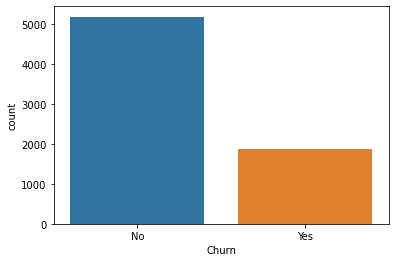

In [7]:
sns.countplot(df['Churn'])

### There is a class imbalance in the Target Column.

In [8]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [9]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [10]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

### Senior Citizen is in interger type, we should change this into string type.

In [11]:
df['SeniorCitizen']=df['SeniorCitizen'].astype(str)

### Total Charges is in string type, we should change this into integer type.

In [14]:
for i in df.index:
    if df['TotalCharges'][i]==' ':
        print(i)
        df['TotalCharges'][i]=0

488
753
936
1082
1340
3331
3826
4380
5218
6670
6754


In [15]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [16]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [17]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [18]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

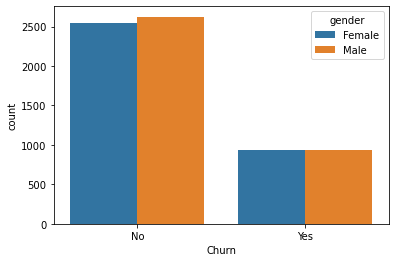

In [19]:
sns.countplot(df['Churn'],hue=df['gender'])

### There are almost equal male and female customers who did not leave the company.

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

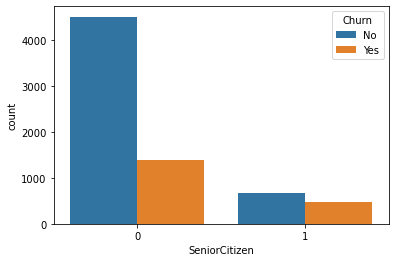

In [20]:
sns.countplot(df['SeniorCitizen'],hue=df['Churn'])

### Comparitively Most of the senior citizens left the company.

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

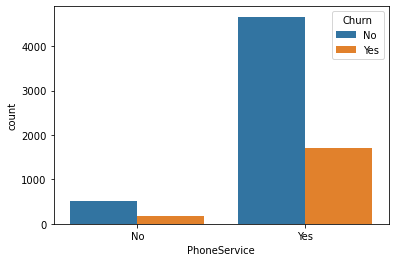

In [21]:
sns.countplot(df['PhoneService'],hue=df['Churn'])

### There is no significant relation between churn and Phone Service.

<AxesSubplot:xlabel='InternetService', ylabel='count'>

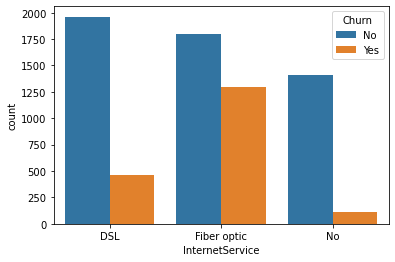

In [22]:
sns.countplot(df['InternetService'],hue=df['Churn'])

### Most of the customers with DSL Internet connection stays in the company.

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

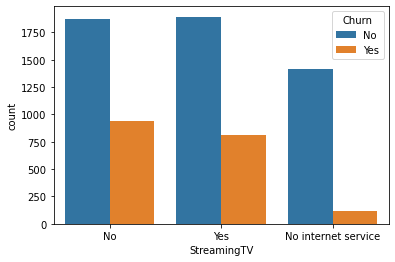

In [23]:
sns.countplot(df['StreamingTV'],hue=df['Churn'])

### Most of the customers without internet service stays in the company.

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

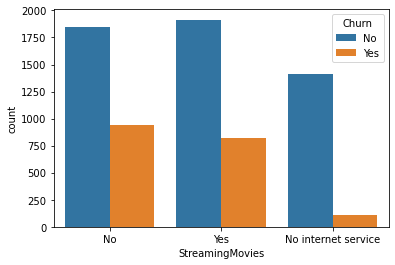

In [24]:
sns.countplot(df['StreamingMovies'],hue=df['Churn'])

### This is same as streaming TV. Most of the customers who can stream movies has a small tendency to leave the company.

<AxesSubplot:xlabel='Contract', ylabel='count'>

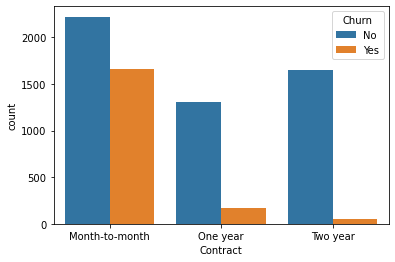

In [25]:
sns.countplot(df['Contract'],hue=df['Churn'])

### Customers with montly contract switches the company frequently. Long Term contract customers stays in the company as their term is long.

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

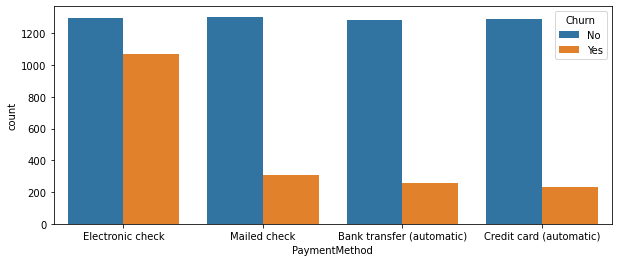

In [26]:
plt.figure(figsize=(10,4))
sns.countplot(df['PaymentMethod'],hue=df['Churn'])

### If the payment method is electronic check, most of the customers leaves the company.

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

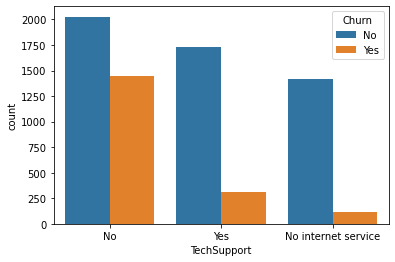

In [27]:
sns.countplot(df['TechSupport'],hue=df['Churn'])

### If there is no Technical support, most of the customers leaves the company.

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

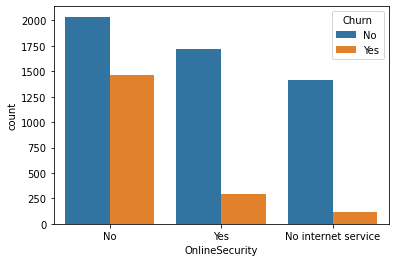

In [28]:
sns.countplot(df['OnlineSecurity'],hue=df['Churn'])

### If there is no online security, most of the customers leaves the company.

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

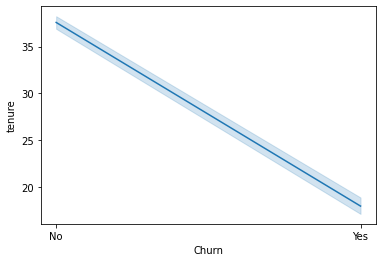

In [29]:
sns.lineplot(df['Churn'],df['tenure'])

### If the tenure is less, there is a tendency that customer leaves the company.

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

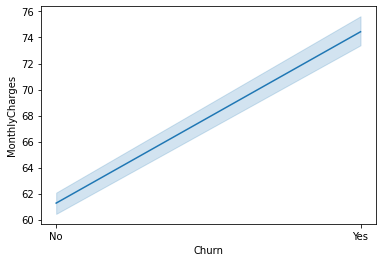

In [30]:
sns.lineplot(df['Churn'],df['MonthlyCharges'])

### If the Monthly charges more, there is a tendency that customer leaves the company.

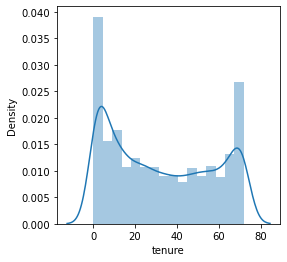

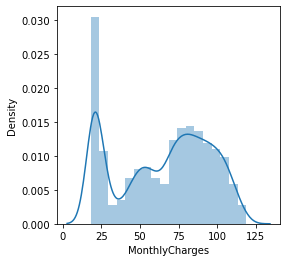

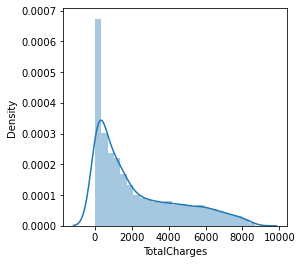

In [34]:
t=['tenure','MonthlyCharges','TotalCharges']
for i in t:
    plt.figure(figsize=(4,4))
    sns.distplot(df[i])

### These columns are not normally distributed.

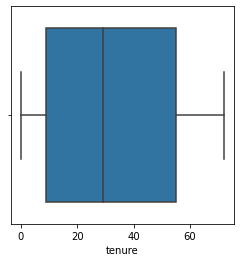

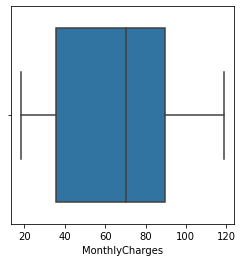

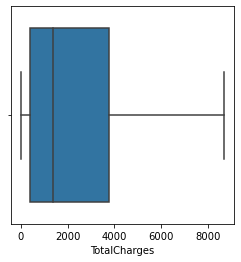

In [35]:
for i in t:
    plt.figure(figsize=(4,4))
    sns.boxplot(df[i])

### There are no outliers present in the data

## Skewness

In [36]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.963235
dtype: float64

In [37]:
from sklearn.preprocessing import PowerTransformer
s=['TotalCharges']
pt = PowerTransformer(method = 'yeo-johnson')
for i in s:
    df[i] = pt.fit_transform(np.array(df[i]).reshape(-1,1))[:,0]

In [38]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges     -0.146121
dtype: float64

## Encoding

In [40]:
cate=list(df.columns)
cate.remove('tenure')
cate.remove('MonthlyCharges')
cate.remove('TotalCharges')
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
for i in cate:
    df[i]=lab.fit_transform(df[i].values.reshape(-1,1))

In [41]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,-1.792996,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,0.254809,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,-1.375173,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,0.233807,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,-1.239490,1


In [43]:
### CustomerID column is not necasry for prediction.

df.drop(['customerID'],axis=1,inplace=True)

<AxesSubplot:>

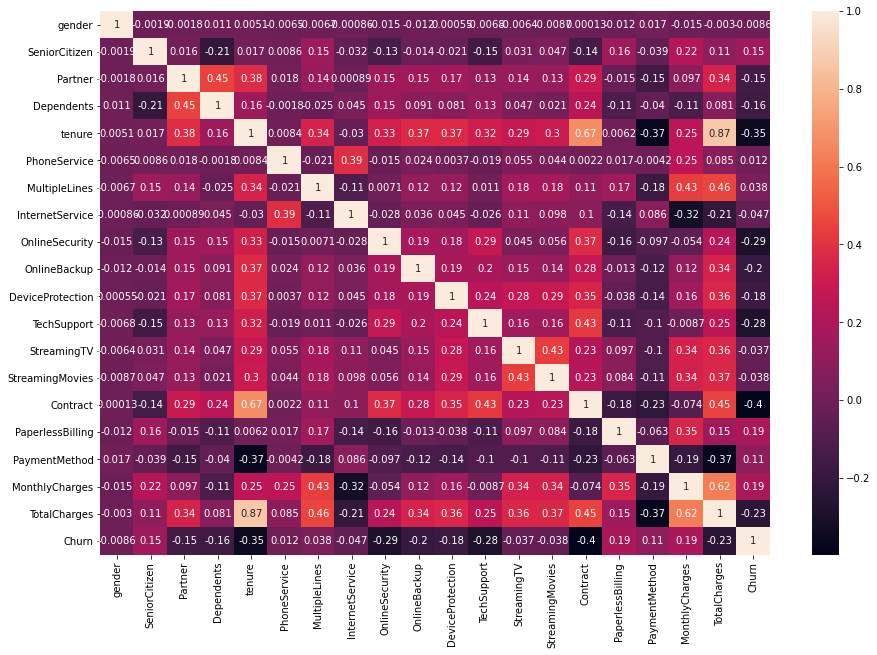

In [45]:
cor=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot=True)

In [47]:
x=df.drop(['Churn'],axis=1)
y=df['Churn']

## VIF

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['col']=x.columns
vif

,vif,col
0,1.993689,gender
1,1.370088,SeniorCitizen
2,2.821591,Partner
3,1.962673,Dependents
4,13.994393,tenure
5,15.856564,PhoneService
6,2.753402,MultipleLines
7,4.469879,InternetService
8,2.268283,OnlineSecurity
9,2.436450,OnlineBackup


### We should drop the column with highest VIF score until all the values are below 5.

In [49]:
x.drop(['MonthlyCharges'],axis=1,inplace=True)

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['col']=x.columns
vif

,vif,col
0,1.976523,gender
1,1.341513,SeniorCitizen
2,2.816296,Partner
3,1.961248,Dependents
4,13.832557,tenure
5,8.168734,PhoneService
6,2.437814,MultipleLines
7,3.617049,InternetService
8,2.266929,OnlineSecurity
9,2.415114,OnlineBackup


In [51]:
x.drop(['tenure'],axis=1,inplace=True)

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['col']=x.columns
vif

,vif,col
0,1.932633,gender
1,1.336439,SeniorCitizen
2,2.747516,Partner
3,1.960631,Dependents
4,7.827177,PhoneService
5,2.396190,MultipleLines
6,3.469153,InternetService
7,2.209806,OnlineSecurity
8,2.355124,OnlineBackup
9,2.574094,DeviceProtection


In [53]:
x.drop(['PhoneService'],axis=1,inplace=True)

### Here for all the columns, VIF score is less than 5. Therefore, Multi-Collinearity in data is removed.

## Scaling

In [54]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x.head()

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.792996
1,0.990532,-0.439916,-0.966622,-0.654012,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,0.254809
2,0.990532,-0.439916,-0.966622,-0.654012,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-1.375173
3,0.990532,-0.439916,-0.966622,-0.654012,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,0.233807
4,-1.009559,-0.439916,-0.966622,-0.654012,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.239490


## Sampling

In [55]:
from imblearn.over_sampling import SMOTE
smo=SMOTE()
x,y=smo.fit_resample(x,y)

In [56]:
y.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

## Choosing Random State Value

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
maxac=0
maxran=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    sam=DecisionTreeClassifier()
    sam.fit(x_train,y_train)
    pred=sam.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxac:
        maxac=acc
        maxran=i
print('max accuracy=',maxac,'ran state=',maxran)

max accuracy= 0.808695652173913 ran state= 8


In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=maxran)

## Model Selection

### Decision Tree Classifier

In [59]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred1=dtc.predict(x_test)
dtc_clas1=classification_report(y_test,pred1)
acc1=accuracy_score(y_test,pred1)
print(acc1)
print(dtc_clas1)

0.8
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1057
           1       0.80      0.79      0.80      1013

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



In [60]:
from sklearn.metrics import confusion_matrix
con1=confusion_matrix(y_test,pred1)
con1

array([[852, 205],
       [209, 804]], dtype=int64)

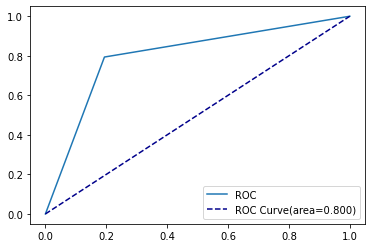

In [61]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds =roc_curve(y_test, pred1)
area_under_curve=roc_auc_score(y_test, pred1)
# Printing ROC curve
plt.plot(fpr,tpr,label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(area=%0.3f)'%area_under_curve)
plt.legend()
plt.show()

### Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred2=rfc.predict(x_test)
rfc_clas2=classification_report(y_test,pred2)
acc2=accuracy_score(y_test,pred2)
print(acc2)
print(rfc_clas2)

0.8570048309178744
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1057
           1       0.86      0.85      0.85      1013

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



In [63]:
con2=confusion_matrix(y_test,pred2)
con2

array([[916, 141],
       [155, 858]], dtype=int64)

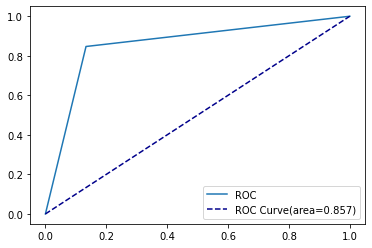

In [64]:
fpr, tpr, thresholds =roc_curve(y_test, pred2)
area_under_curve=roc_auc_score(y_test, pred2)
# Printing ROC curve
plt.plot(fpr,tpr,label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(area=%0.3f)'%area_under_curve)
plt.legend()
plt.show()

### Support Vectors

In [65]:
from sklearn.svm import SVC
sup=SVC()
sup.fit(x_train,y_train)
pred3=sup.predict(x_test)
sv_clas3=classification_report(y_test,pred3)
acc3=accuracy_score(y_test,pred3)
print(acc3)
print(sv_clas3)

0.8082125603864734
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1057
           1       0.78      0.84      0.81      1013

    accuracy                           0.81      2070
   macro avg       0.81      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070



In [66]:
con3=confusion_matrix(y_test,pred3)
con3

array([[822, 235],
       [162, 851]], dtype=int64)

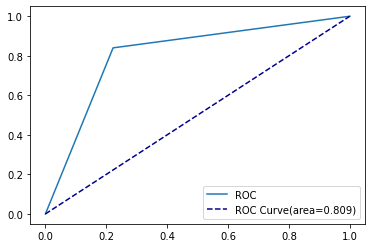

In [67]:
fpr, tpr, thresholds =roc_curve(y_test, pred3)
area_under_curve=roc_auc_score(y_test, pred3)
# Printing ROC curve
plt.plot(fpr,tpr,label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(area=%0.3f)'%area_under_curve)
plt.legend()
plt.show()

### Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred4=lr.predict(x_test)
lr_clas4=classification_report(y_test,pred4)
acc4=accuracy_score(y_test,pred4)
print(acc4)
print(lr_clas4)

0.7536231884057971
              precision    recall  f1-score   support

           0       0.80      0.70      0.74      1057
           1       0.72      0.81      0.76      1013

    accuracy                           0.75      2070
   macro avg       0.76      0.75      0.75      2070
weighted avg       0.76      0.75      0.75      2070



In [69]:
con4=confusion_matrix(y_test,pred4)
con4

array([[735, 322],
       [188, 825]], dtype=int64)

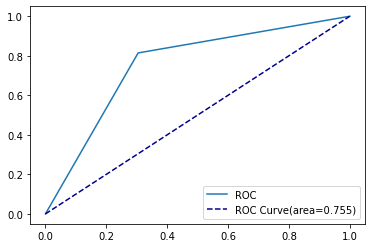

In [70]:
fpr, tpr, thresholds =roc_curve(y_test, pred4)
area_under_curve=roc_auc_score(y_test, pred4)
# Printing ROC curve
plt.plot(fpr,tpr,label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(area=%0.3f)'%area_under_curve)
plt.legend()
plt.show()

## Cross Validation

In [75]:
from sklearn.model_selection import cross_val_score
cv1=cross_val_score(dtc,x,y,cv=7).mean()
cv2=cross_val_score(rfc,x,y,cv=7).mean()
cv3=cross_val_score(sup,x,y,cv=7).mean()
cv4=cross_val_score(lr,x,y,cv=7).mean()
print(cv1,cv2,cv3,cv4)

0.7863511416418557 0.8442393522198204 0.8060551830269693 0.7563801592682241


In [76]:
print(abs(acc1-cv1),abs(acc2-cv2),abs(acc3-cv3),abs(acc4-cv4))

0.013648858358144333 0.012765478698054 0.0021573773595040535 0.0027569708624269884


### We can choose Support Vectors as our model since its cv_score and accuracy score are almost similar.

In [78]:
from sklearn.model_selection import GridSearchCV
parameters={'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'gamma':['scale', 'auto'],'decision_function_shape':['ovo', 'ovr'],
           'shrinking':[True,False]}
gsc=GridSearchCV(sup,parameters)
gsc.fit(x_train,y_train)
print(gsc.best_params_)

{'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf', 'shrinking': True}


In [79]:
fin_churn_model=SVC(decision_function_shape='ovo',gamma='scale',kernel='rbf',shrinking=True)
fin_churn_model.fit(x_train,y_train)
pred5=fin_churn_model.predict(x_test)
sv_acc=accuracy_score(y_test,pred5)
print("Final_Accuracy:",sv_acc*100)

Final_Accuracy: 80.82125603864733


In [80]:
con5=confusion_matrix(y_test,pred5)
con5

array([[822, 235],
       [162, 851]], dtype=int64)

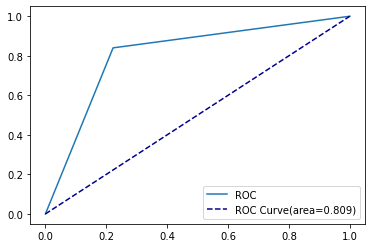

In [81]:
fpr, tpr, thresholds =roc_curve(y_test, pred5)
area_under_curve=roc_auc_score(y_test, pred5)
# Print ROC curve
plt.plot(fpr,tpr,label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(area=%0.3f)'%area_under_curve)
plt.legend()
plt.show()

## Saving the Model

In [82]:
import joblib
joblib.dump(fin_churn_model,'Final_churn_mod.pkl')

['Final_churn_mod.pkl']